In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import math
import os

In [127]:
from colors import *
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(18, 7), "xtick.bottom": True, "grid.linestyle": ":"})

# Preprocessing

In [128]:
PATH = "../data/0603_all"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [129]:
file_data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    try:
        mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
    except:
        print(data_in, file)
    file_data.append(data_in)
    
data = pd.concat(file_data)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\1490253437.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)


Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_bitblt_small_7b09114c-6ac9-4f3a-bf32-870c9ea6fbb9.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_getdbits_small_454d1363-16c4-47f4-9a8b-f5b7919aedee.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_getpixel_small_a5c0ada5-5e93-4a02-a287-e88c5de7ac55.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_none_small_87d762e5-e57f-4df3-baf9-3875e2aa2ce8.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_windup_fullscreen_small_912d64aa-3a74-4059-ac55-f5e529628ce9.csv


### Only use fullscreen data here

In [130]:
data.loc[data.fullscreen == 'fullscreen', 'fullscreen'] = True
data = data[data['fullscreen'] == True]
data = data[data['framework'] != 'glumpy_sdl']
data = data[data['framework'] != 'glumpy_glfw']
data = data[data['framework'] != 'glumpy_qt5']
data = data[data['framework'] != 'glumpy_pyglet']
data = data[data['framework'] != 'DirectX11']

In [131]:
nones = data[data['program'] == 'none']
runnings = data[data['program'] != 'none']
runnings_cleaned = runnings[runnings['fw'] != -1]
data = pd.concat([nones, runnings_cleaned])

In [132]:
#TODO: find another way for recignizing whether framework was started/has decorations/another issue occurred
data = data[data['ete'] > 200]

data['ete'] = data['ete'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000

data.loc[data.fw == -0.001, 'fw'] = -1
data.loc[data.program == 'windup_fullscreen', 'program'] = 'windup'
data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\315882506.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.0 - small' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'


In [133]:
framework_count = data['framework'].nunique()
sqrt = int(math.sqrt(framework_count)) + 1
framework_list = data['framework'].unique()

In [134]:
data_default = data[data['complexity'] == 'default']
data_rects = data[data['complexity'] == 'rects']
data_3D = data[data['complexity'] == '3D']

In [135]:
data_3D

,Unnamed: 0.1,Unnamed: 0,id,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete,fw,diff,threshold
0,NaN,0,0.0,Direct3D,3D,Direct3D_3D,True,NaN,none,9.353,-1.000,9.354,511
1,NaN,1,1.0,Direct3D,3D,Direct3D_3D,True,NaN,none,7.518,-1.000,7.519,511
2,NaN,2,2.0,Direct3D,3D,Direct3D_3D,True,NaN,none,9.003,-1.000,9.004,511
3,NaN,3,3.0,Direct3D,3D,Direct3D_3D,True,NaN,none,8.444,-1.000,8.445,511
4,NaN,4,4.0,Direct3D,3D,Direct3D_3D,True,NaN,none,8.812,-1.000,8.813,511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,NaN,45,45.0,Unity,3D,Unity_3D,True,3.0,windup,10.010,9.244,0.766,514
46,NaN,46,46.0,Unity,3D,Unity_3D,True,3.0,windup,10.346,9.608,0.738,514
47,NaN,47,47.0,Unity,3D,Unity_3D,True,3.0,windup,11.225,9.524,1.701,514
48,NaN,48,48.0,Unity,3D,Unity_3D,True,3.0,windup,12.213,10.274,1.939,514


In [136]:
COLOR_DARK_BLUE = '#18206F'
COLOR_MEDIUMDARK_BLUE = '#3661AB'
COLOR_MEDIUMLIGHT_BLUE = '#5CABFF'
COLOR_LIGHT_BLUE = '#0FDFFF'

COLOR_GLUTROT = '#DA3C43'
COLOR_DARK_RED = '#EC6200'
COLOR_MEDIUM_RED = '#ff8f1c'
COLOR_LIGHT_RED = '#ffb412'

HEIDENELKE_1 = '#9c004b'
HEIDENELKE_2 = '#cc0063'
HEIDENELKE_3 = '#f50076'
HEIDENELKE_4 = '#ff3396'

PALETTE_HEIDENELKE = [HEIDENELKE_1, HEIDENELKE_2, HEIDENELKE_3, HEIDENELKE_4]

PALETTE_REDS = [COLOR_GLUTROT, COLOR_DARK_RED, COLOR_MEDIUM_RED, COLOR_LIGHT_RED]
PALETTE_REDS_SIMPLE = [COLOR_GLUTROT]

PALETTE_BLUES = [COLOR_DARK_BLUE, COLOR_MEDIUMDARK_BLUE, COLOR_MEDIUMLIGHT_BLUE, COLOR_LIGHT_BLUE]
PALETTE_BLUES_SIMPLE = [COLOR_DARK_BLUE, COLOR_LIGHT_BLUE]


COLOR_NONE = '#8E8E8D'
PALETTE_BLUES_W = [COLOR_NONE, COLOR_DARK_BLUE, COLOR_MEDIUMDARK_BLUE, COLOR_MEDIUMLIGHT_BLUE, COLOR_LIGHT_BLUE]
PALETTE_REDS_W = [COLOR_NONE, COLOR_GLUTROT, COLOR_DARK_RED, COLOR_MEDIUM_RED, COLOR_LIGHT_RED]
PALETTE_HEIDENELKE_W = [COLOR_NONE, HEIDENELKE_1, HEIDENELKE_2, HEIDENELKE_3, HEIDENELKE_4]

PALETTE_MULTI = [COLOR_NONE, COLOR_DARK_BLUE, COLOR_GLUTROT, COLOR_HEIDENELKE]
PALETTE_THREE = [COLOR_DARK_BLUE, COLOR_GLUTROT, COLOR_HEIDENELKE]

# End-to-End Latency

## End-to-end latencies over all frameworks

Text(0.5, 1.0, 'end-to-end latency for pixel reader')

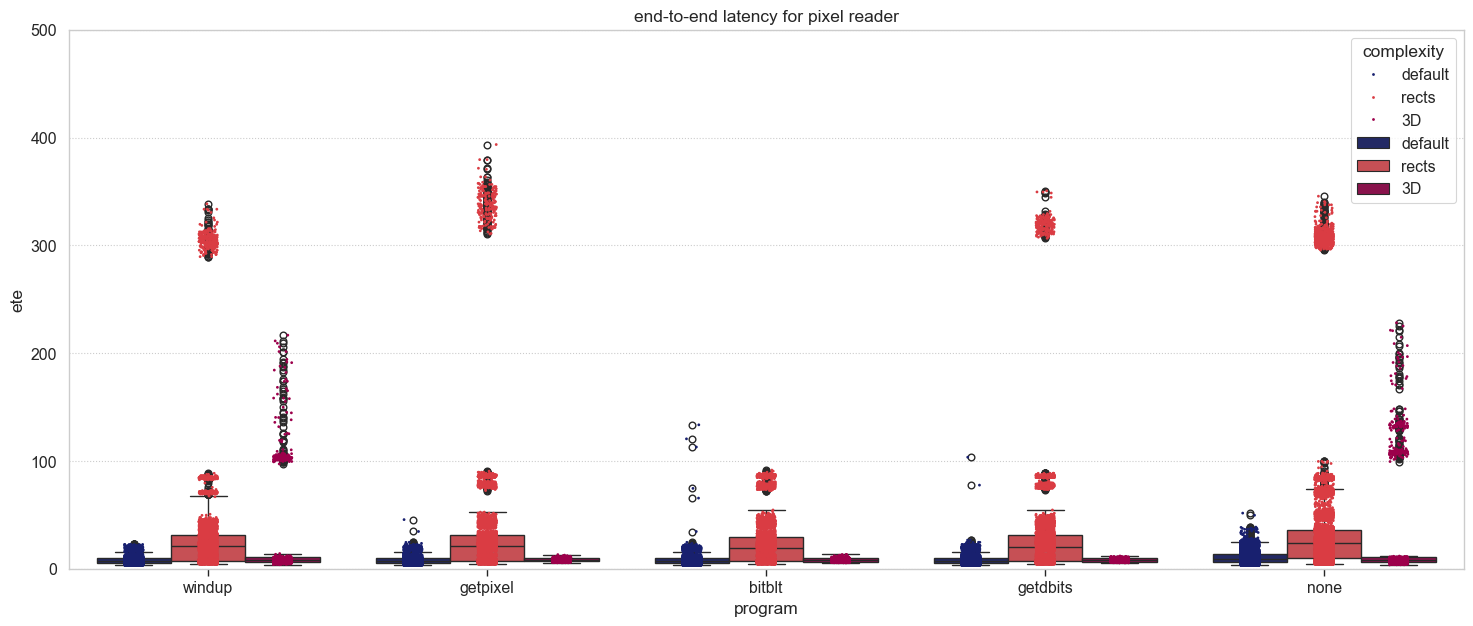

In [137]:
plot = sns.stripplot(data=data, x='program', y='ete', hue='complexity', palette=PALETTE_THREE, order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], dodge=True, size=2)
plot = sns.boxplot(data=data, x='program', y='ete', hue='complexity', palette=PALETTE_THREE, order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], dodge=True)
plot.set_ylim(0, 500)
plot.set_title('end-to-end latency for pixel reader')

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\1177279592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_fs = sns.boxplot(ax=axs[0], data=data_default, x='program', y='ete', palette=PALETTE_BLUES_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\1177279592.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_nfs = sns.boxplot(ax=axs[1], data=data_rects, x='program', y='ete', palette=PALETTE_REDS_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\1177279592.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

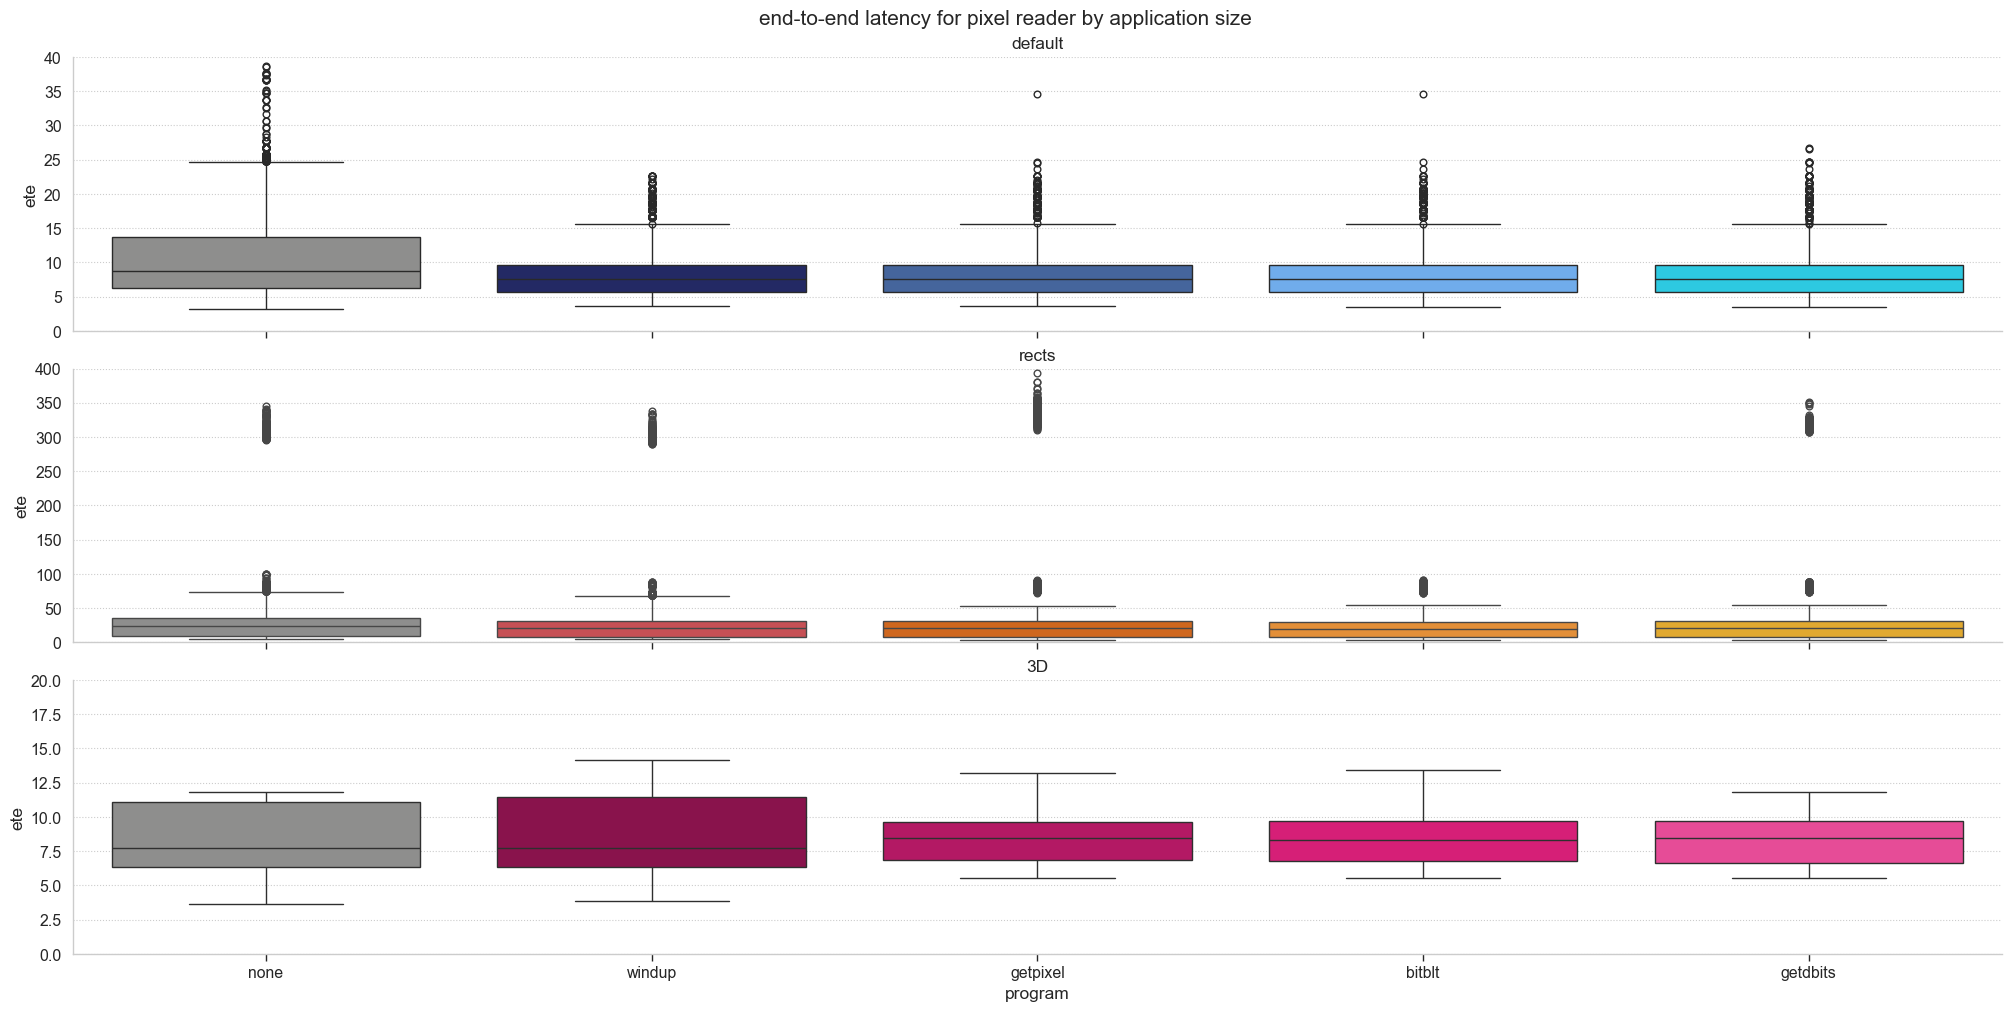

In [138]:
fig, axs = plt.subplots(3, 1, layout='constrained', sharex=True, figsize=(20, 10))
fig.suptitle("end-to-end latency for pixel reader by application size")

#plot_fs = sns.stripplot(ax=axs[0], data=data_default, x='program', y='ete', palette=PALETTE_W_NREUTRAL_BLUE, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], size=2)
plot_fs = sns.boxplot(ax=axs[0], data=data_default, x='program', y='ete', palette=PALETTE_BLUES_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_fs.set_ylim(0, 40)
plot_fs.set_title('default')

#plot_nfs = sns.stripplot(ax=axs[1], data=data_rects, x='program', y='ete', palette=PALETTE_W_NREUTRAL_RED, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], size=2)
plot_nfs = sns.boxplot(ax=axs[1], data=data_rects, x='program', y='ete', palette=PALETTE_REDS_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_nfs.set_ylim(0, 400)
plot_nfs.set_title('rects')

#plot_small = sns.stripplot(ax=axs[2], data=data_3D, x='program', y='ete', palette=PALETTE_W_NREUTRAL_GREEN, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], size=2)
plot_small = sns.boxplot(ax=axs[2], data=data_3D, x='program', y='ete', palette=PALETTE_HEIDENELKE_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_small.set_ylim(0, 20)
plot_small.set_title('3D')

sns.despine(bottom = False, left = False)

## End-to-end latencies for each framework

### frameworks separately

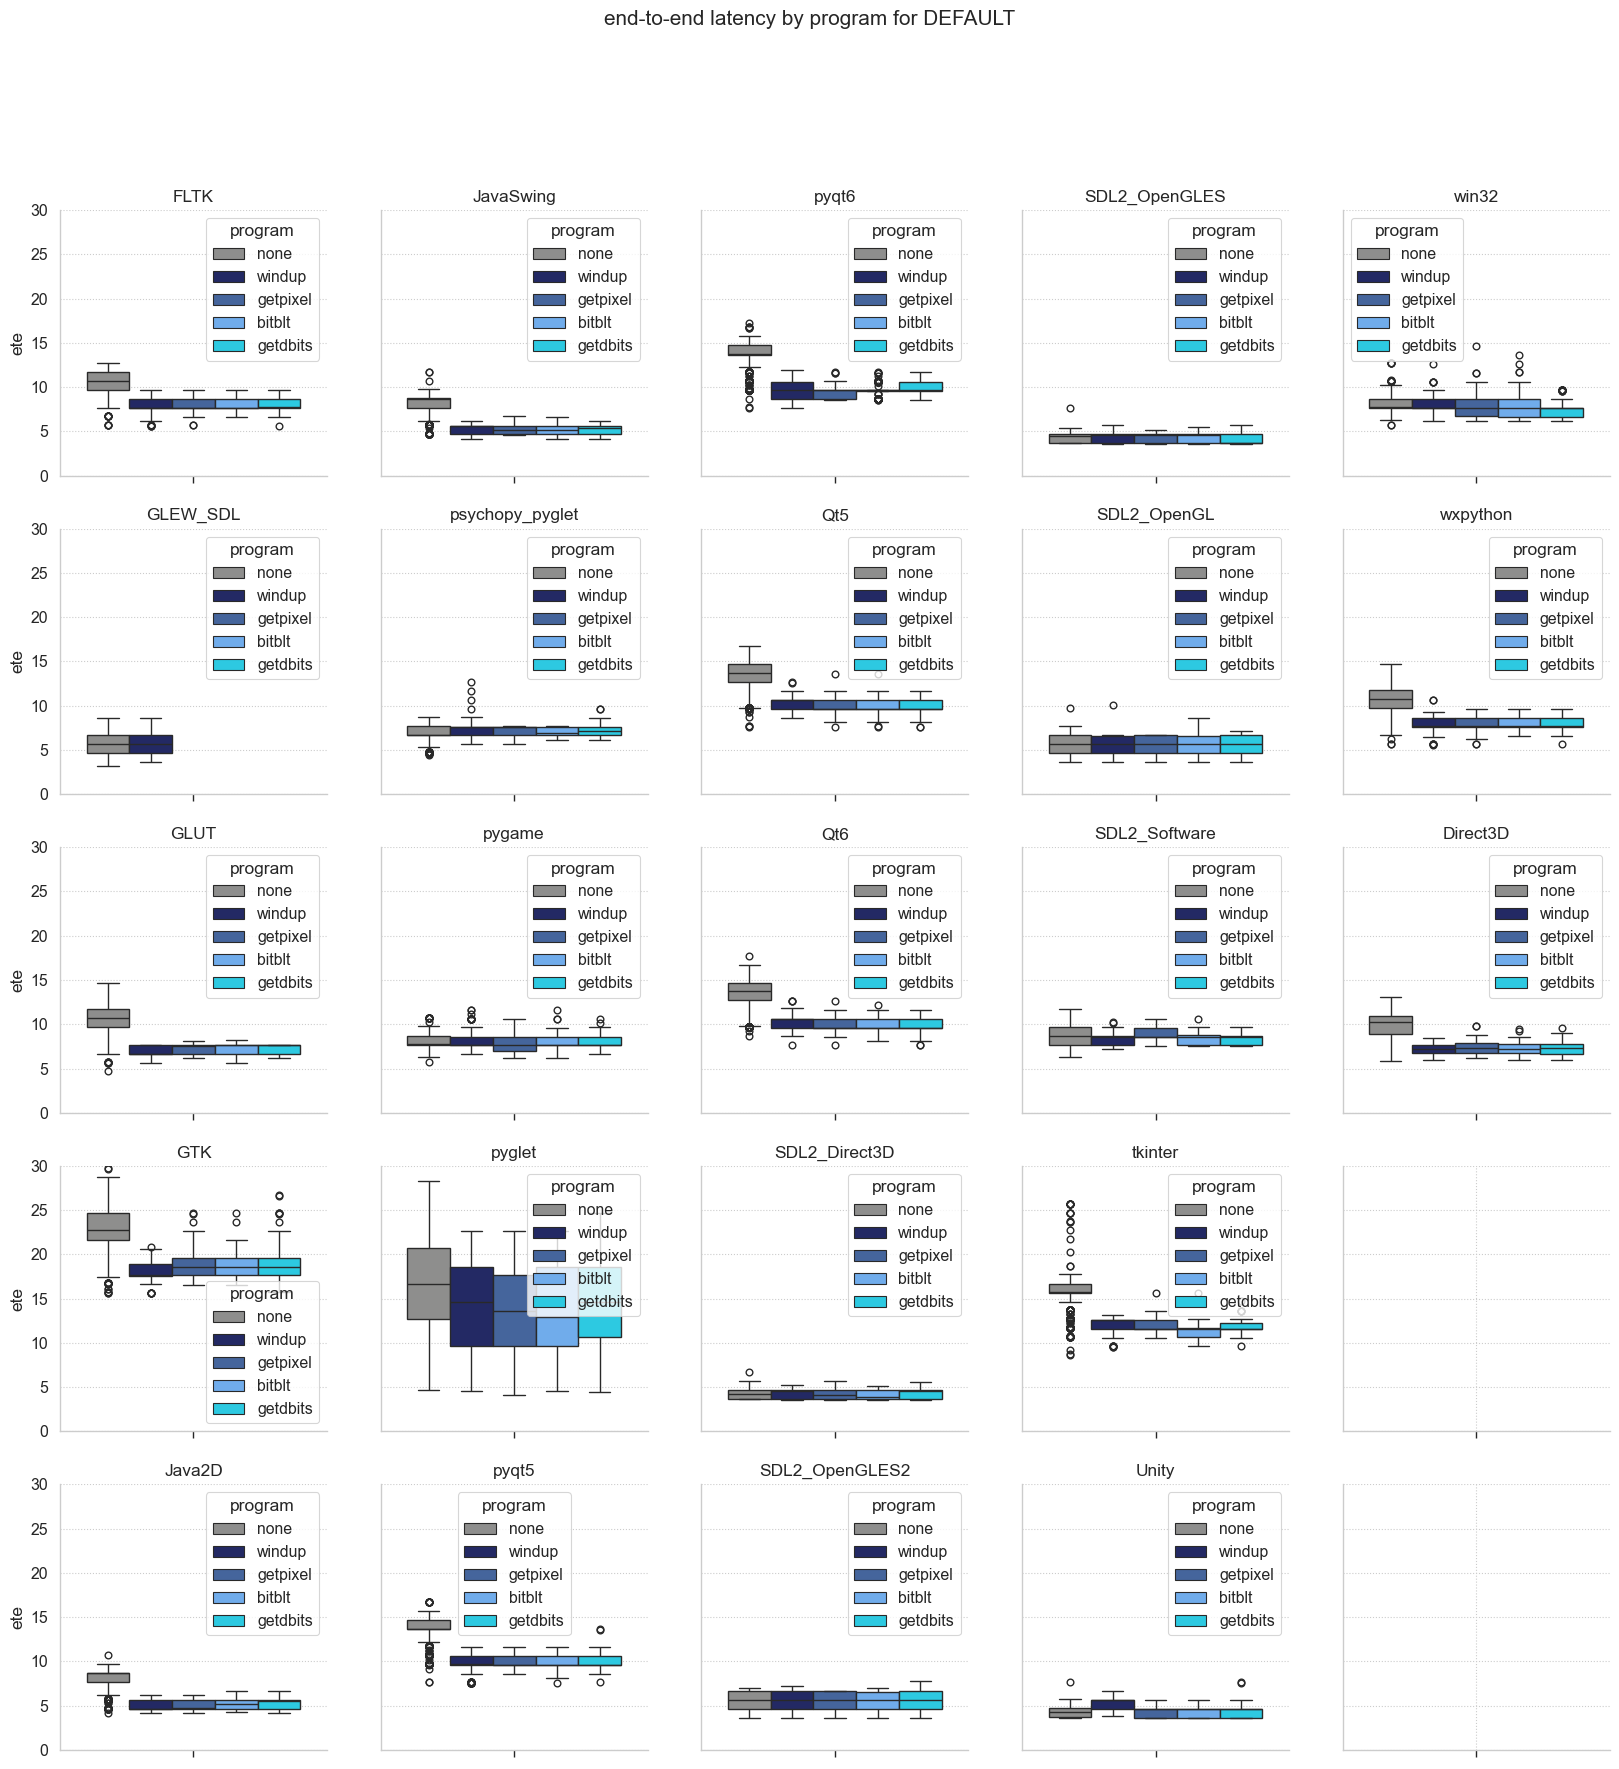

In [139]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("end-to-end latency by program for DEFAULT")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_default[data_default['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_BLUES_W)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 30)

sns.despine(bottom = False, left = False)

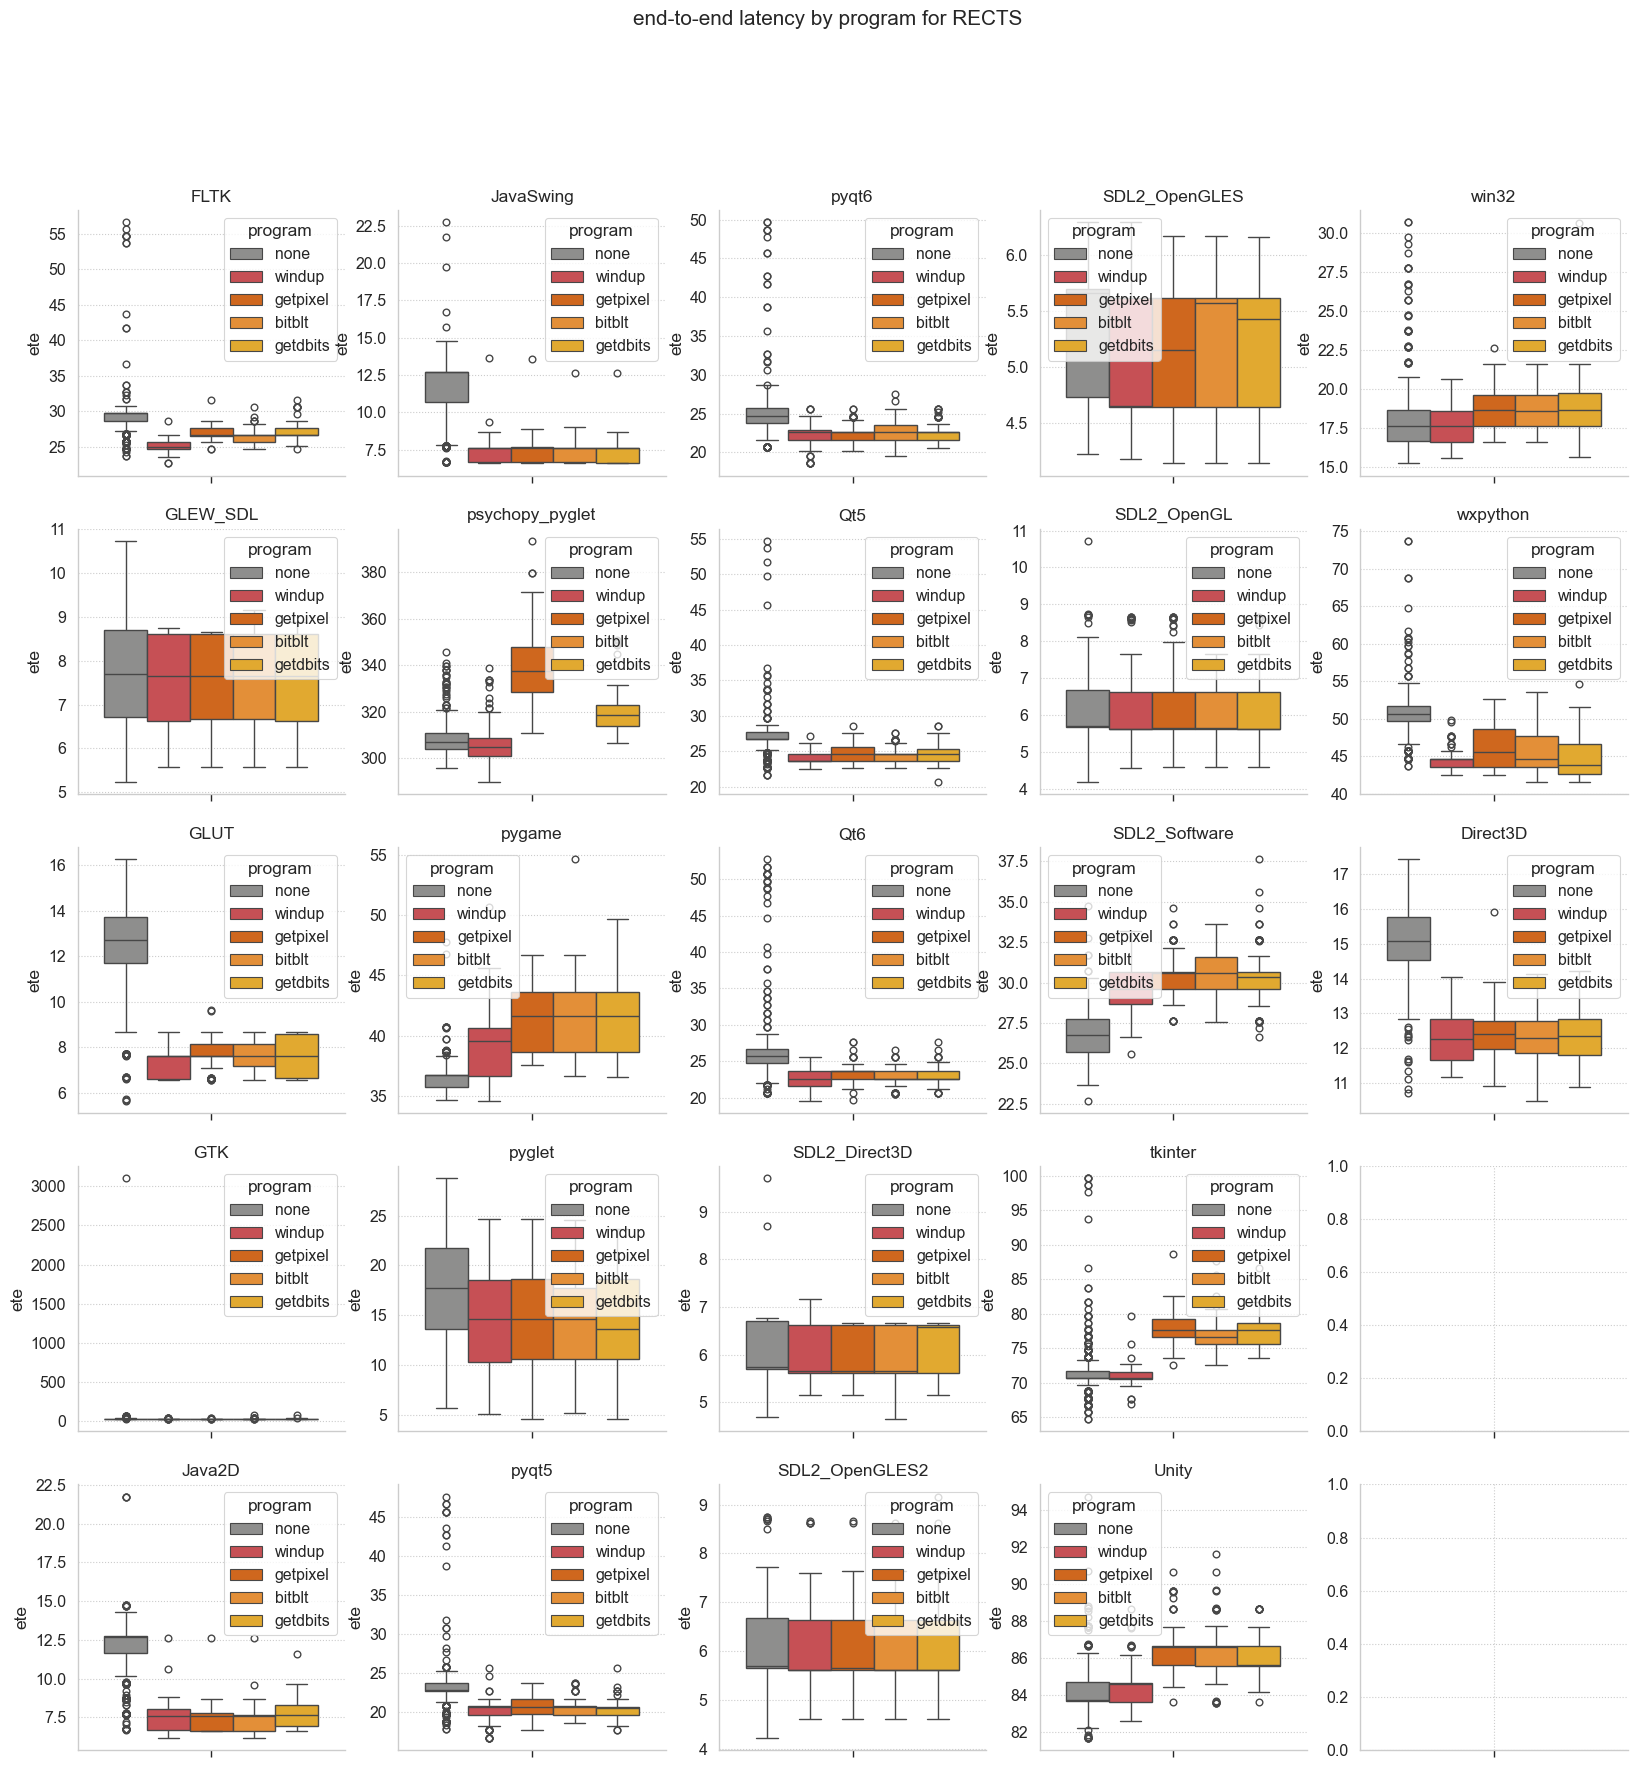

In [140]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True)
fig.suptitle("end-to-end latency by program for RECTS")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_rects[data_rects['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_REDS_W)
    axes[x, y].set_title(framework)
    #axes[x, y].set_ylim(0, 100)

sns.despine(bottom = False, left = False)

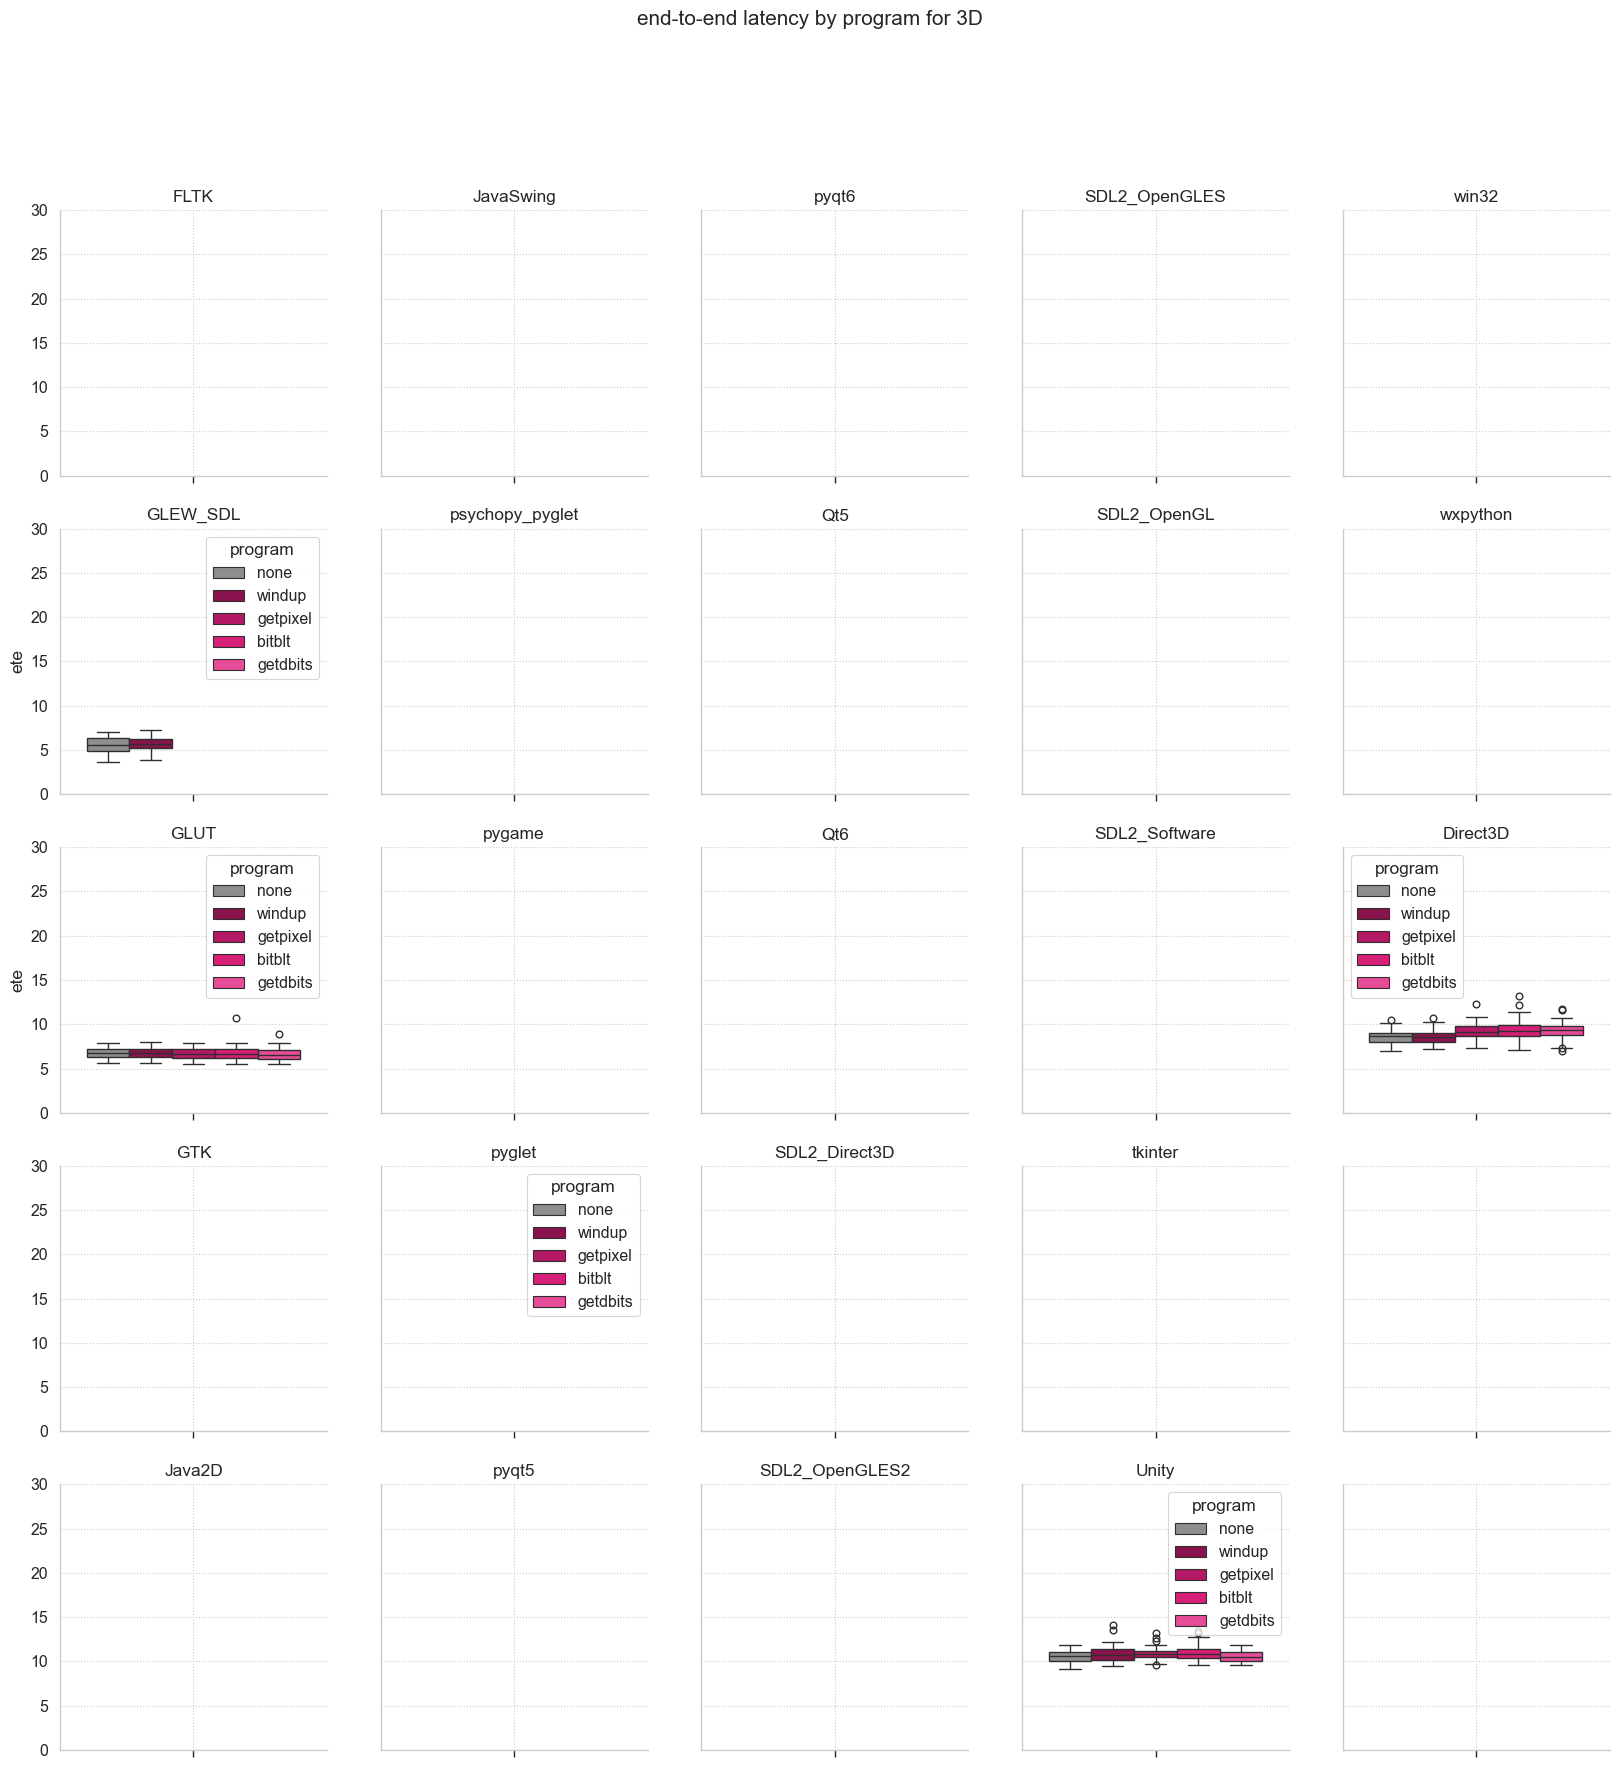

In [141]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("end-to-end latency by program for 3D")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_3D[data_3D['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_HEIDENELKE_W)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 30)

sns.despine(bottom = False, left = False)

### overview

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\4192153285.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)


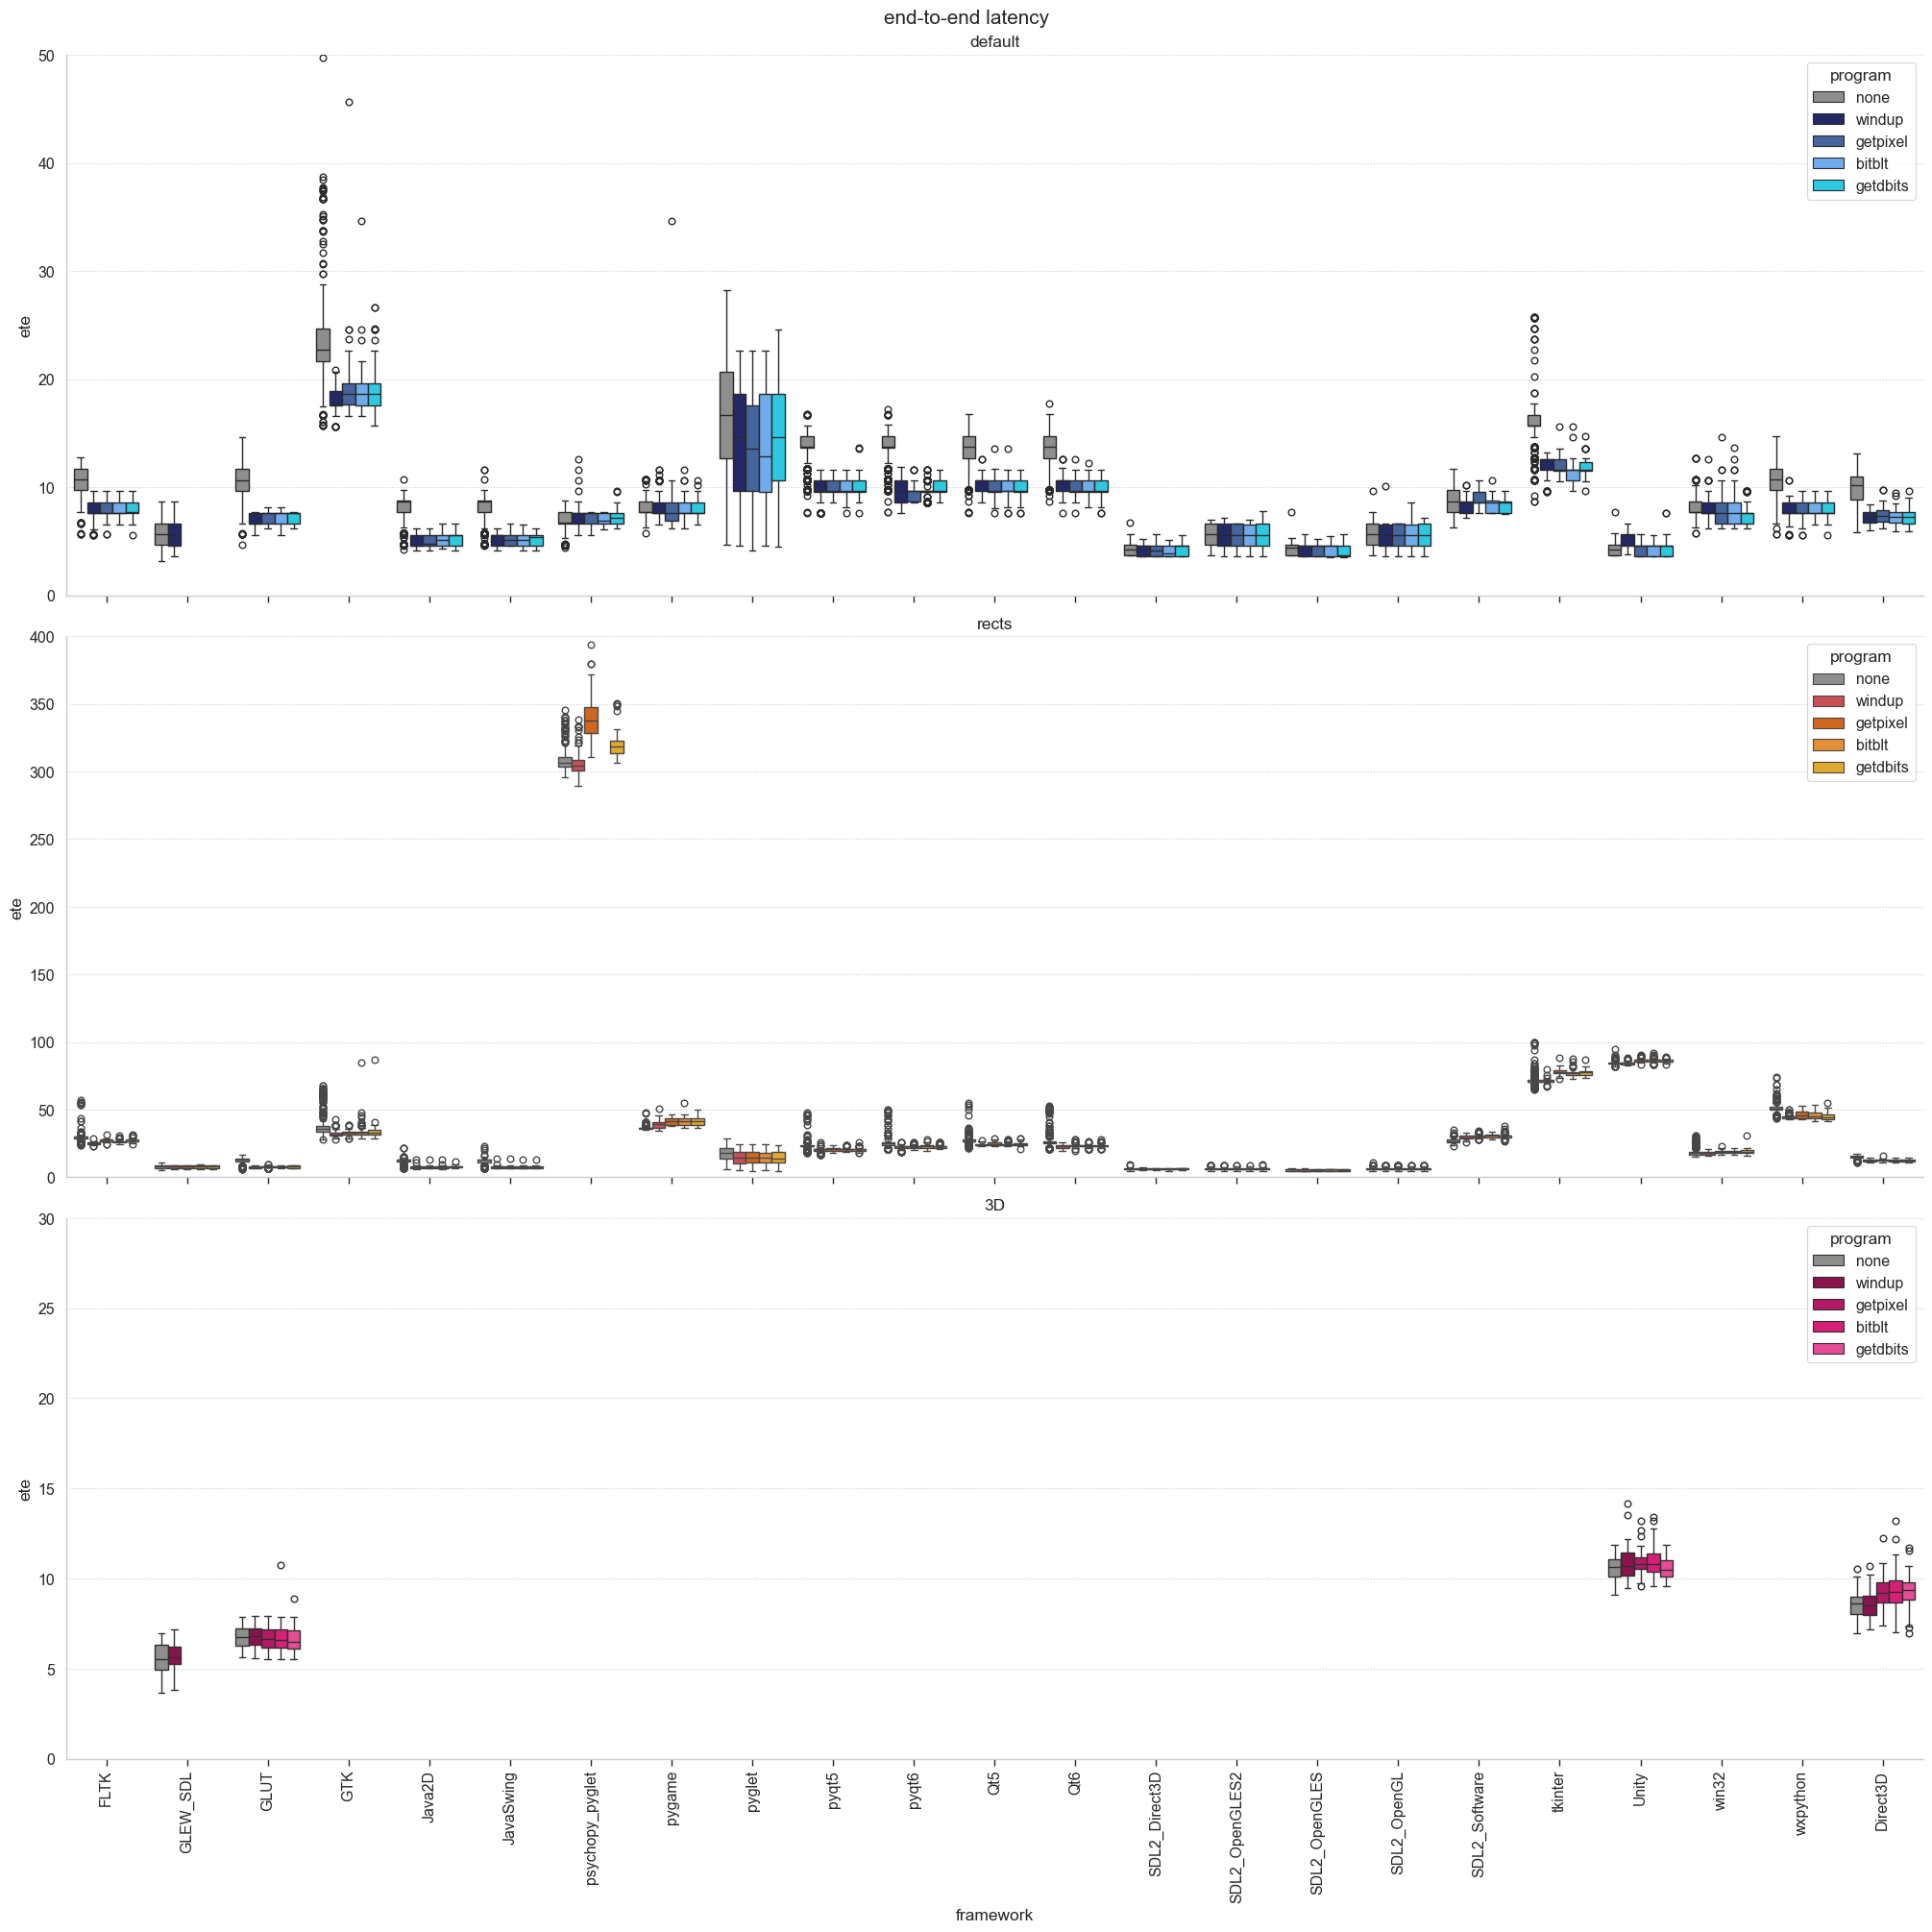

In [142]:
fig, axs = plt.subplots(3, 1, layout='constrained', sharex=True, figsize=(20, 20))
fig.suptitle("end-to-end latency")

plot_fs = sns.boxplot(ax=axs[0], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES_W)
plot_fs.set_title('default')
axs[0].set_ylim(0, 50)

plot_nfs = sns.boxplot(ax=axs[1], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS_W)
plot_nfs.set_title('rects')
axs[1].set_ylim(0, 400)

plot_small = sns.boxplot(ax=axs[2], data=data[data['complexity'] == '3D'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE_W)
plot_small.set_title('3D')
axs[2].set_ylim(0, 30)

axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)

sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\1174535170.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)


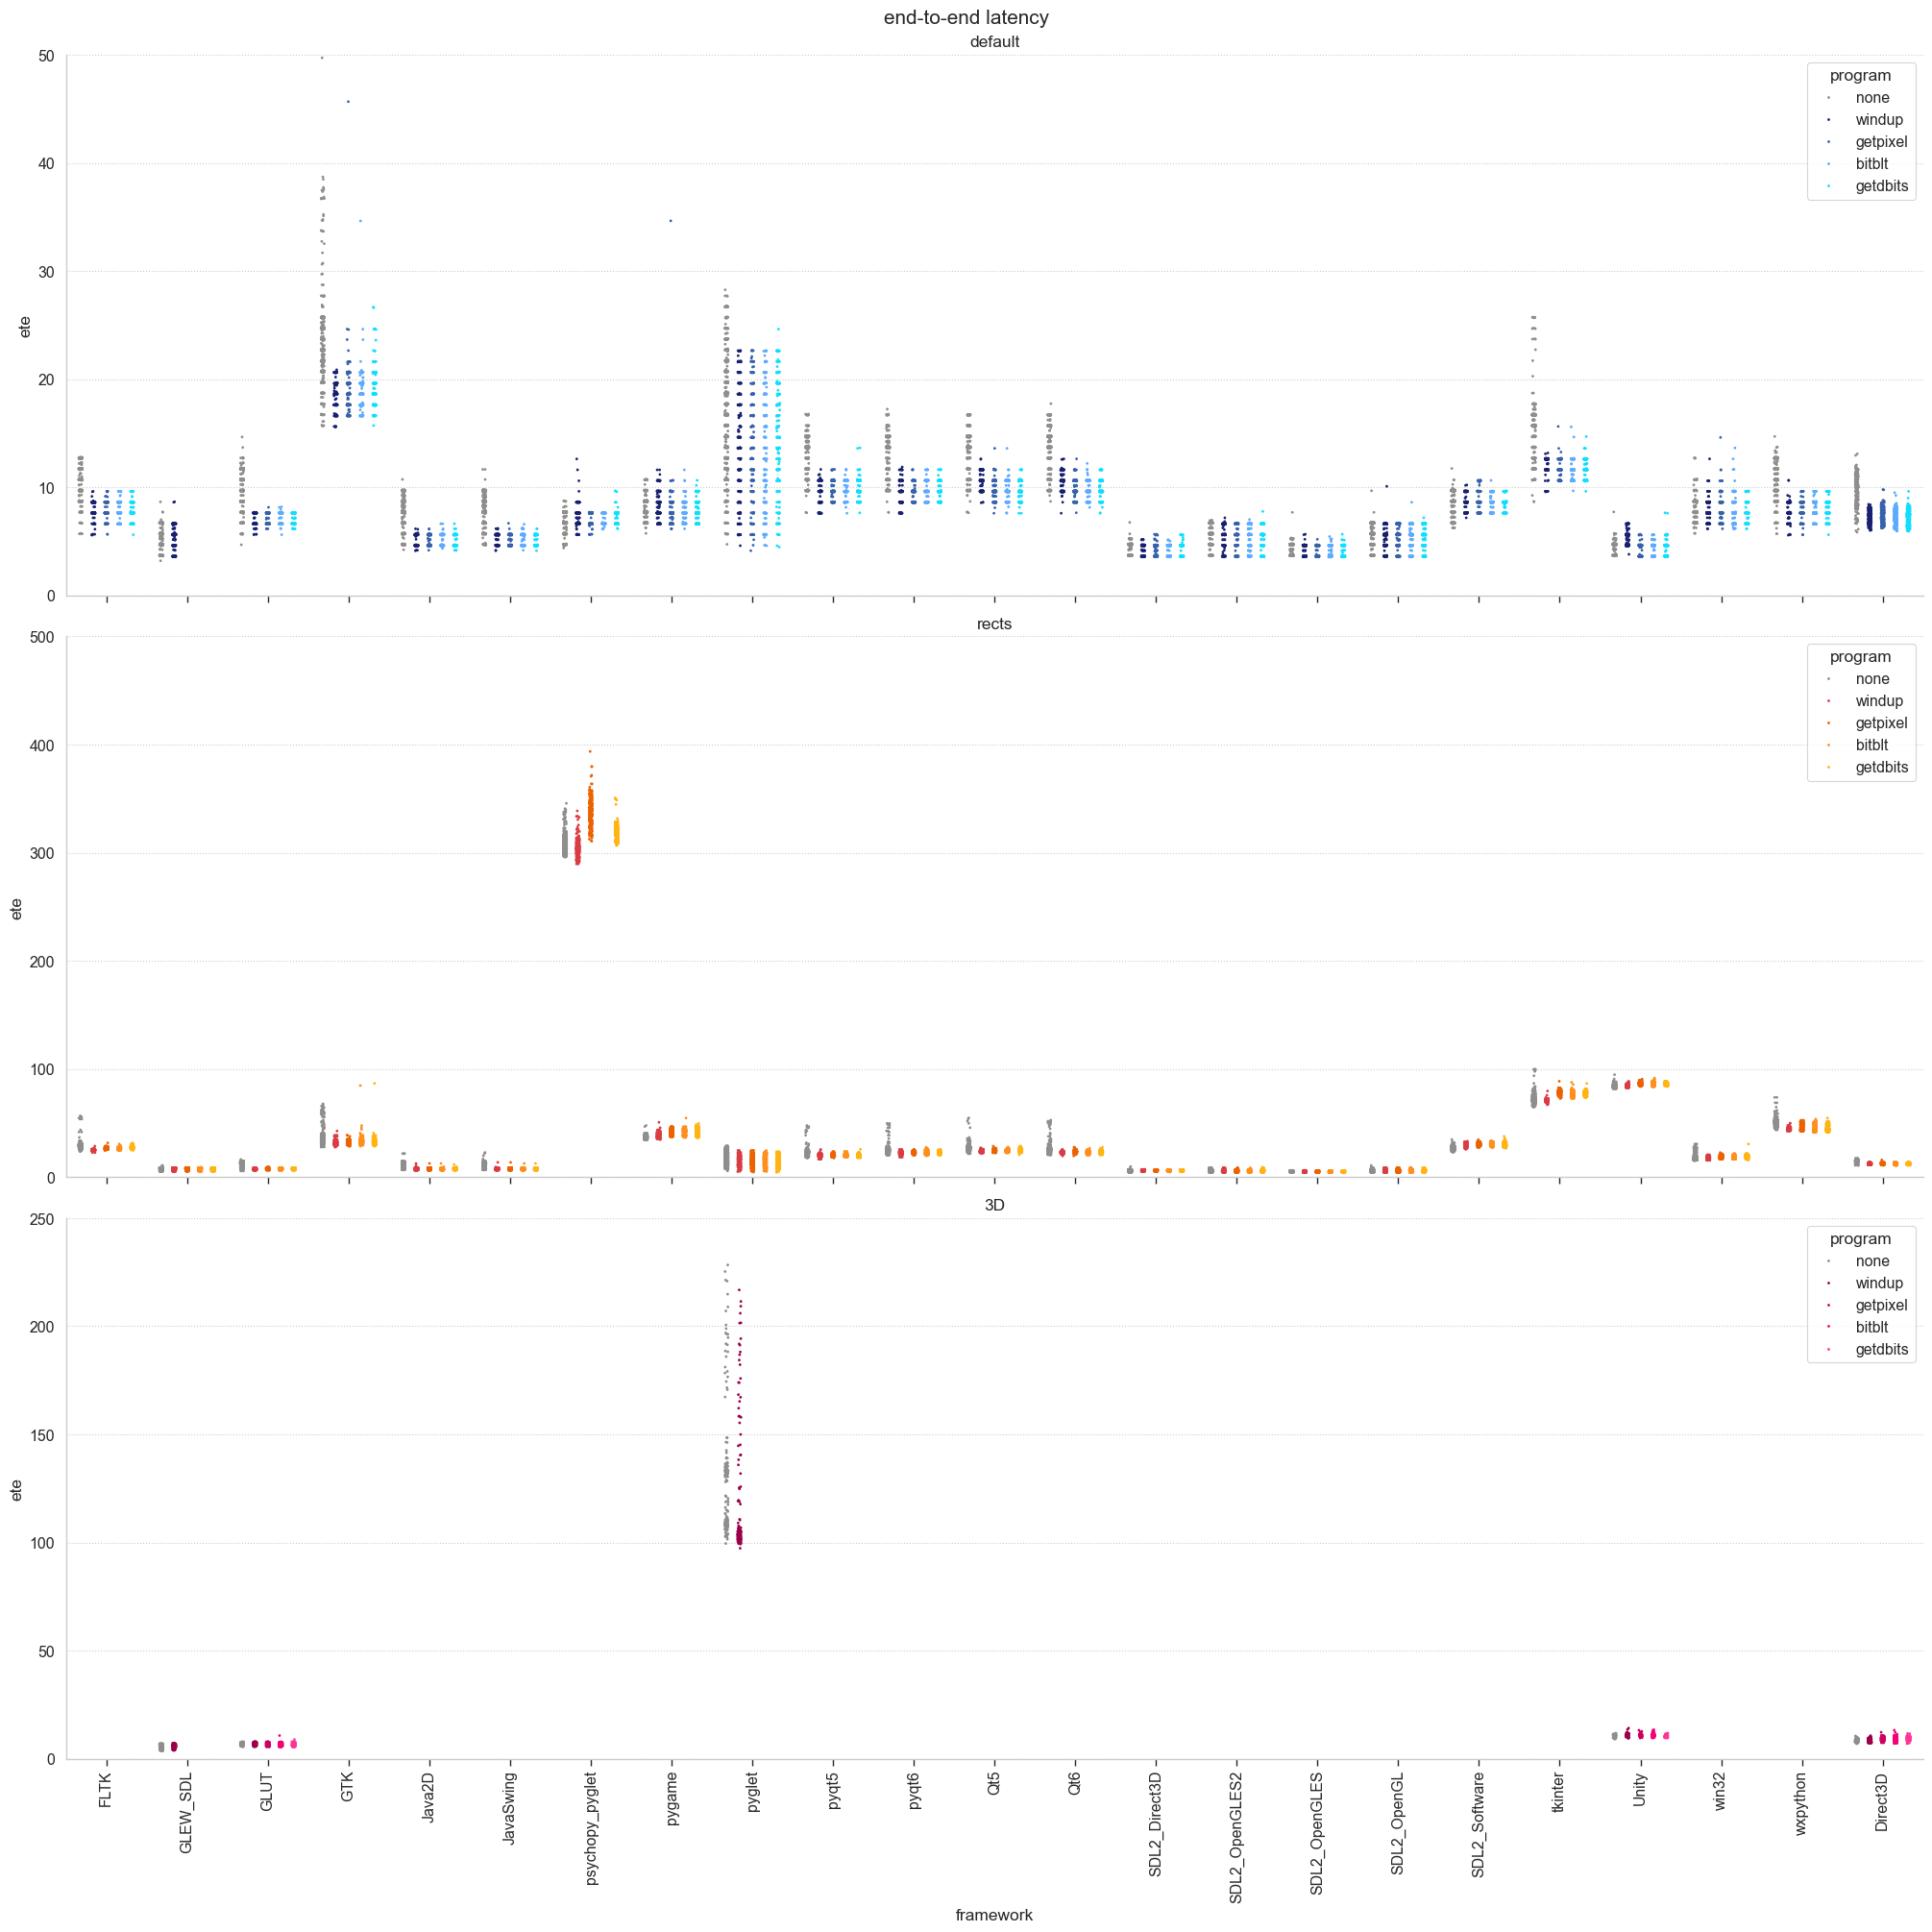

In [143]:
fig, axs = plt.subplots(3, 1, layout='constrained', sharex=True, figsize=(20, 20))
fig.suptitle("end-to-end latency")

plot_fs = sns.stripplot(ax=axs[0], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES_W, size=2)
plot_fs.set_title('default')
axs[0].set_ylim(0, 50)

plot_nfs = sns.stripplot(ax=axs[1], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS_W, size=2)
plot_nfs.set_title('rects')
axs[1].set_ylim(0, 500)

plot_small = sns.stripplot(ax=axs[2], data=data[data['complexity'] == '3D'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE_W, size=2)
plot_small.set_title('3D')
axs[2].set_ylim(0, 250)

axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)

sns.despine(bottom = False, left = False)

## End-to-end latency: Descriptive Stats

### DEFAULT

In [144]:
data_temp = data_default.copy()

data_none = data_temp[data_temp['program'] == 'none']
data_windup = data_temp[data_temp['program'] == 'windup']
data_getpixel = data_temp[data_temp['program'] == 'getpixel']
data_bitblt = data_temp[data_temp['program'] == 'bitblt']
data_getdbits = data_temp[data_temp['program'] == 'getdbits']

data_default_desc = pd.concat([data_none['ete'], data_windup['ete'], data_getpixel['ete'], data_bitblt['ete'], data_getdbits['ete']], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_default_desc.describe())

,none,windup,getpixel,bitblt,getdbits
count,17800.000000,5200.000000,4800.000000,4800.000000,4800.000000
mean,9.886768,8.124850,8.164833,8.207947,8.218583
std,5.040625,3.449565,3.586087,4.693067,3.984272
min,3.208000,3.587000,3.587000,3.545000,3.546000
25%,6.249000,5.616000,5.617000,5.616000,5.618000
50%,8.702000,7.601000,7.642000,7.642000,7.642000
75%,13.640000,9.629000,9.628000,9.628000,9.628000
max,51.702000,22.645000,45.663000,133.602000,103.569000


### RECTS

In [145]:
data_temp = data_rects.copy()

data_none = data_temp[data_temp['program'] == 'none']
data_windup = data_temp[data_temp['program'] == 'windup']
data_getpixel = data_temp[data_temp['program'] == 'getpixel']
data_bitblt = data_temp[data_temp['program'] == 'bitblt']
data_getdbits = data_temp[data_temp['program'] == 'getdbits']

data_rects_desc = pd.concat([data_none['ete'], data_windup['ete'], data_getpixel['ete'], data_bitblt['ete'], data_getdbits['ete']], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_rects_desc.describe())

,none,windup,getpixel,bitblt,getdbits
count,17681.000000,5196.000000,5100.000000,4790.000000,5100.000000
mean,38.554324,39.204330,36.132500,23.612027,35.274415
std,66.221131,68.642609,64.460576,21.192550,60.940623
min,4.179000,4.179000,4.136000,4.136000,4.136000
25%,9.711000,7.601000,7.601000,7.600000,7.601000
50%,23.698000,21.584500,21.586000,19.639500,20.656000
75%,35.688000,31.641000,31.636000,29.655000,31.641000
max,3105.964000,338.626000,393.610000,91.614000,350.639000


### 3D

In [146]:
data_temp = data_3D.copy()

data_none_ete = data_temp.loc[data_temp['program'] == 'none', 'ete'].reset_index(drop=True)
data_windup_ete = data_temp.loc[data_temp['program'] == 'windup', 'ete'].reset_index(drop=True)
data_getpixel_ete = data_temp.loc[data_temp['program'] == 'getpixel', 'ete'].reset_index(drop=True)
data_bitblt_ete = data_temp.loc[data_temp['program'] == 'bitblt', 'ete'].reset_index(drop=True)
data_getdbits_ete = data_temp.loc[data_temp['program'] == 'getdbits', 'ete'].reset_index(drop=True)

data_3D_desc = pd.concat([data_none_ete, data_windup_ete, data_getpixel_ete, data_bitblt_ete, data_getdbits_ete], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

# data_none = data_temp[data_temp['program'] == 'none']
# data_windup = data_temp[data_temp['program'] == 'windup']
# data_getpixel = data_temp[data_temp['program'] == 'getpixel']
# data_bitblt = data_temp[data_temp['program'] == 'bitblt']
# data_getdbits = data_temp[data_temp['program'] == 'getdbits']

# data_3D_desc = pd.concat([data_none['ete'], data_windup['ete'], data_getpixel['ete'], data_bitblt['ete'], data_getdbits['ete']], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_3D_desc.describe())

,none,windup,getpixel,bitblt,getdbits
count,850.000000,850.000000,450.000000,450.000000,450.000000
mean,35.629151,33.703759,8.282793,8.297058,8.250033
std,53.183703,56.606491,1.663259,1.755226,1.669898
min,3.634000,3.826000,5.551000,5.504000,5.503000
25%,6.366250,6.371000,6.849250,6.750000,6.606250
50%,7.741000,7.762500,8.476000,8.350500,8.483000
75%,11.063750,11.422000,9.640000,9.722000,9.683000
max,228.329000,927.224000,13.209000,13.411000,11.847000


### OVERALL

In [147]:
data_temp = data.copy()

data_none_ete = data_temp.loc[data_temp['program'] == 'none', 'ete'].reset_index(drop=True)
data_windup_ete = data_temp.loc[data_temp['program'] == 'windup', 'ete'].reset_index(drop=True)
data_getpixel_ete = data_temp.loc[data_temp['program'] == 'getpixel', 'ete'].reset_index(drop=True)
data_bitblt_ete = data_temp.loc[data_temp['program'] == 'bitblt', 'ete'].reset_index(drop=True)
data_getdbits_ete = data_temp.loc[data_temp['program'] == 'getdbits', 'ete'].reset_index(drop=True)

data_desc = pd.concat([data_none_ete, data_windup_ete, data_getpixel_ete, data_bitblt_ete, data_getdbits_ete], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

# data_none = data_temp[data_temp['program'] == 'none']
# data_windup = data_temp[data_temp['program'] == 'windup']
# data_getpixel = data_temp[data_temp['program'] == 'getpixel']
# data_bitblt = data_temp[data_temp['program'] == 'bitblt']
# data_getdbits = data_temp[data_temp['program'] == 'getdbits']

# data_desc = pd.concat([data_none['ete'], data_windup['ete'], data_getpixel['ete'], data_bitblt['ete'], data_getdbits['ete']], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_desc.describe())

,none,windup,getpixel,bitblt,getdbits
count,36331.000000,11246.000000,10350.000000,10040.000000,10350.000000
mean,24.440512,24.417848,21.951131,15.561099,21.551809
std,49.155642,51.521883,47.420854,16.854105,44.946813
min,3.208000,3.587000,3.587000,3.545000,3.546000
25%,6.714000,6.628000,6.629000,6.628000,6.629000
50%,11.703000,8.615000,8.656000,8.616000,8.656000
75%,24.668000,21.586000,21.583750,19.603000,20.657750
max,3105.964000,927.224000,393.610000,133.602000,350.639000


# Differences

In [148]:
data_running = data[data['program'] != 'none']

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\1604824393.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


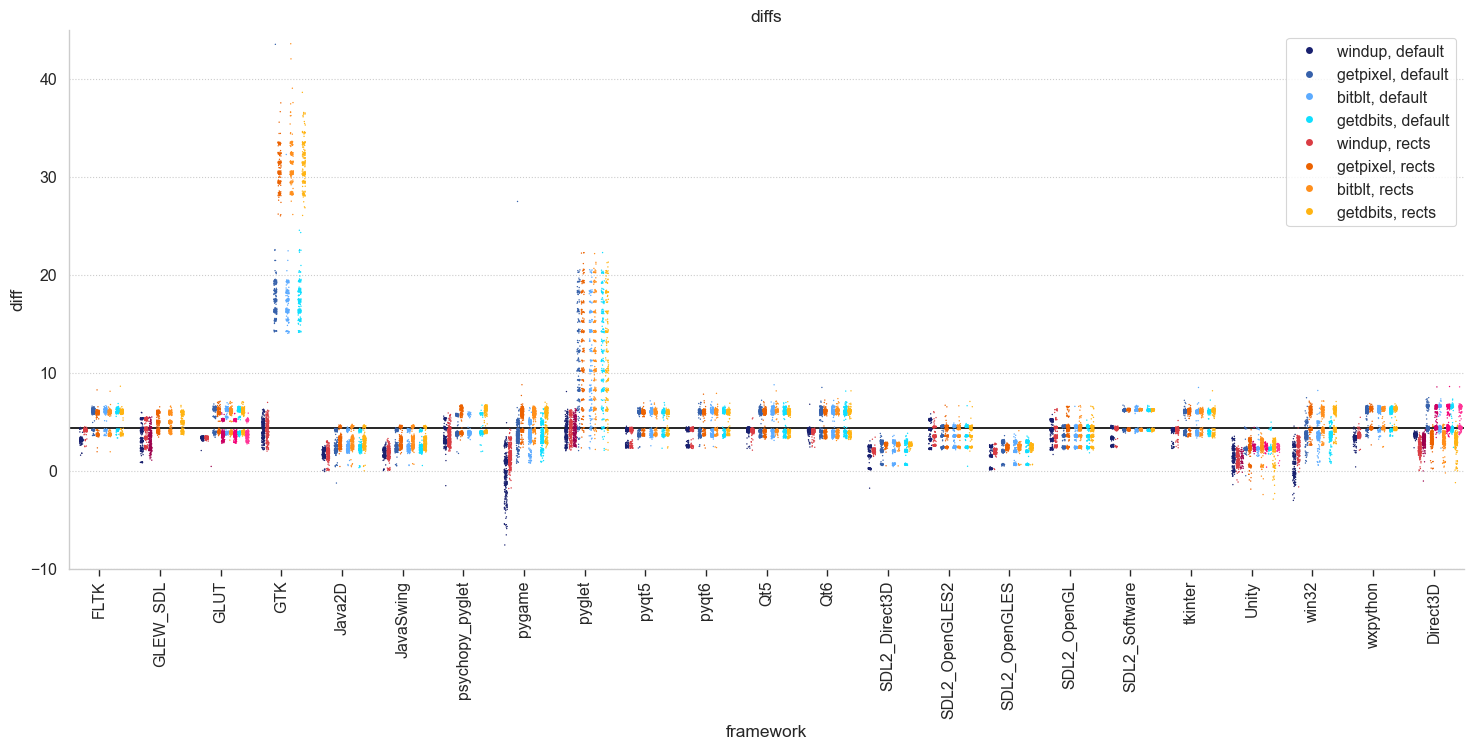

In [149]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data_running[data_running['complexity'] == 'default'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES, size=1)
sns.stripplot(data=data_running[data_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS, transform=offset(0.05)+trans, size=1)
sns.stripplot(data=data_running[data_running['complexity'] == '3D'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE, transform=offset(0.1)+trans, size=1)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.axes.set_ylim(-10, 45)

agg_mean = round(np.mean(diff_means), 1) / 1000
plt.axhline(agg_mean, color='black')

handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, [labels[0] + ', default', labels[1] + ', default',
                      labels[2] + ', default', labels[3] + ', default',
                      labels[4] + ', rects', labels[5] + ', rects',
                      labels[6] + ', rects', labels[7] + ', rects'], markerscale=5.)
plot.set_title('diffs')
sns.despine(bottom = False, left = False)

In [150]:
# data_temp = data.copy()

# data_windup = data_temp[data_temp['program'] == 'windup']
# data_getpixel = data_temp[data_temp['program'] == 'getpixel']
# data_bitblt = data_temp[data_temp['program'] == 'bitblt']
# data_getdbits = data_temp[data_temp['program'] == 'getdbits']

data_temp = data.copy()

# data_none_ete = data_temp.loc[data_temp['program'] == 'none', 'diff'].reset_index(drop=True)
data_windup_ete = data_temp.loc[data_temp['program'] == 'windup', 'diff'].reset_index(drop=True)
data_getpixel_ete = data_temp.loc[data_temp['program'] == 'getpixel', 'diff'].reset_index(drop=True)
data_bitblt_ete = data_temp.loc[data_temp['program'] == 'bitblt', 'diff'].reset_index(drop=True)
data_getdbits_ete = data_temp.loc[data_temp['program'] == 'getdbits', 'diff'].reset_index(drop=True)

data_desc = pd.concat([data_windup_ete, data_getpixel_ete, data_bitblt_ete, data_getdbits_ete], axis=1, keys=['windup', 'getpixel', 'bitblt', 'getdbits'])


#data_desc = pd.concat([data_windup['diff'], data_getpixel['diff'], data_bitblt['diff'], data_getdbits['diff']], axis=1, keys=['windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_desc.describe())

,windup,getpixel,bitblt,getdbits
count,11246.000000,10350.000000,10040.000000,10350.000000
mean,0.482745,5.410313,5.444163,5.413165
std,122.179018,4.615931,5.225083,4.878580
min,-9451.867000,-30.988000,-2.438000,-2.900000
25%,2.240250,3.413000,3.354000,3.366500
50%,3.365000,4.254000,4.218000,4.201000
75%,4.143750,6.076750,6.092000,6.073750
max,8.074000,43.503000,132.432000,102.273000
